# 6 - Supervised Learning and Regression
Mauricio Araya

Acknowledgments to Francisco Förster Burón (CMM-U.Chile / MAS) work



In [139]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

## Overfitting, underfitting and the bias-variance trade-off


Two important ideas in machine learning are **overfitting** and **underfitting**.

If a model represents our data too accurately, it may not generalize well to unobserved data.

A popular solution to reduce overfitting  consists of adding structure to the model through **regularization**. This favors simpler models through training inspired by **Occam's razor**.

## Bias

It quantifies the precision of the model accross the training sets.

## Variance 

It quantifies how sensitive the model is to small changes in the training set.

![](images/biasvariance.png)

## Complexity, accuracy, robustness

In general, we want precise and robust models. 

**Simpler models tend to be less accurate, but more robust.**

**More complex models tend to be more accurate, but less robust.**

This tension is usually expressed as the **bias-variance trade-off** which is central to machine learning

## Model selection

No model performs uniformly better than the others. One model may perform better in one data set and badly on another.

## Classification vs regression

![](images/ml.png)

## 1 - Regularized Regression in 1D (slides)

### Example training set: the iris data set

![title](images/iris.png)

![title](images/irises.png)

In [4]:
import seaborn as sns
%matplotlib inline
sns.set(style="ticks")

dfIris = sns.load_dataset("iris")
dfIris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


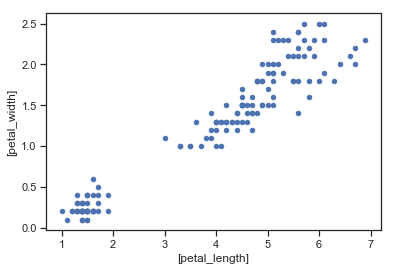

In [141]:
dfIris.plot.scatter(['petal_length'],['petal_width'])

In [6]:
import numpy as np
X=dfIris[['petal_length']]
y=dfIris[['petal_width']]
xvals=np.linspace(X.min(),X.max(),200)

In [9]:
%matplotlib inline
from sklearn.linear_model import Ridge,Lasso,LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt

def train_and_plot(d=15,a=0.1):
    gen_poly_terms = PolynomialFeatures(degree=d)
    X_train_with_poly = gen_poly_terms.fit_transform(X)
    poly_regression = Lasso(alpha=a)
    #poly_regression = Ridge(alpha=a)
    #poly_regression = LinearRegression()
    poly_regression.fit(X_train_with_poly, y)
    poly_vals=gen_poly_terms.transform(xvals)
    y_pred=poly_regression.predict(poly_vals)
    fig, ax = plt.subplots()
    dfIris.plot.scatter('petal_length','petal_width',color='gray',alpha=0.1,label='data',ax=ax)
    ax.plot(xvals,y_pred, color='red', linewidth=1.0, label='regression line')
    plt.legend()
    plt.figure()
    #plt.bar(range(len(poly_regression.coef_[0])),poly_regression.coef_[0])
    plt.bar(range(len(poly_regression.coef_)),poly_regression.coef_)

In [8]:
from ipywidgets import interact
interact(train_and_plot,d=(2,30),a=(0.0,2.0,0.1))

interactive(children=(IntSlider(value=15, description='d', max=30, min=2), FloatSlider(value=0.1, description=…

<function __main__.train_and_plot(d=15, a=0.1)>

## 2.- Linear Regression... without training wheels

### Objective

As an exercise lets do a linear regression without training wheels:
* <b>Left wheel</b>: $x \in \mathbb{R}$ --> $\mathbf{x} \in \mathbb{R}^n$ variable
* <b>Right wheel</b>: `scikit-learn` package --> just `pandas`, `numpy` and `scipy`

### Theory
What is a linear model?
$$ y = f(\mathbf{x};\mathbf{w}) = \sum_j w_j \phi_j(\mathbf{x}) = \mathbf{w}^\textrm{T} \boldsymbol{\phi}(\mathbf{x}) $$

Examples:
* Polinomial: $\phi_j(\mathbf{x}) = \|\mathbf{x}\|^j$
* Gaussian: $\phi_j(\mathbf{x}) = \exp\left\{\frac{- \|\mathbf{x} - \boldsymbol{\mu}_j\|^2}{2s^2}\right\}$
* Sigmoidal: $\phi_j(\mathbf{x}) = \sigma\left(\frac{\|\mathbf{x} - \boldsymbol{\mu}_j\|}{s}\right)= \frac{1}{1 + \exp\left( \frac{-\|\mathbf{x} - \boldsymbol{\mu}_j\|}{s}\right)}$

In [158]:
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import interact

def show_gaussian(mu=0.0,s=1.0):
    a = np.arange(-10, 10, 0.1)
    plt.plot(a, np.exp(-(a-mu)**2/(2*s**2)))
interact(show_gaussian,mu=(-2.0,2.0),s=(0.1,10))

interactive(children=(FloatSlider(value=0.0, description='mu', max=2.0, min=-2.0), FloatSlider(value=1.0, desc…

<function __main__.show_gaussian(mu=0.0, s=1.0)>

In [159]:
def show_sigmoid(mu=0.0,s=1.0):
    a = np.arange(-10, 10, 0.1)
    plt.plot(a, 1./(1. + np.exp(-(a-mu)/s)))
interact(show_sigmoid,mu=(-2.0,2.0),s=(0.1,10))

interactive(children=(FloatSlider(value=0.0, description='mu', max=2.0, min=-2.0), FloatSlider(value=1.0, desc…

<function __main__.show_sigmoid(mu=0.0, s=1.0)>

Imagine you fix every $\mu_j$ and $s$. 

<b>How we can learn</b> $\mathbf{w}$ (assuming Gaussian noise $\epsilon \sim N(\mu,\sigma)$)?

$$\begin{align} Pr(Y \mid \mathbf{X},\mathbf{y}) &= \prod_i \mathcal{N}(Y = y_i \mid f(\mathbf{x}_i;\mathbf{w}),\sigma)\\ &= \prod_i \mathcal{N}(Y = y_i \mid \mathbf{w}^\textrm{T} \boldsymbol{\phi}(\mathbf{x}_i),\sigma)\end{align} $$

We want to maximize this probability

$$ \begin{align} \ln Pr(Y \mid \mathbf{X},\mathbf{y}) & = \sum_i \ln \mathcal{N}(Y = y_i \mid \mathbf{w}^\textrm{T} \boldsymbol{\phi}(\mathbf{x}_i),\sigma)\\ & \propto \sum_i\left( y_i - \mathbf{w}^\textrm{T} \boldsymbol{\phi}(\mathbf{x}_i)\right)^2 \end{align} $$

If we compute the gradient of this
$$ \begin{align} \nabla\ln Pr(Y \mid \mathbf{X},\mathbf{y}) & = \sum_i\left( y_i - \mathbf{w}^\textrm{T}\boldsymbol{\phi}(\mathbf{x}_i)\right)\boldsymbol{\phi}(\mathbf{x}_i)^\textrm{T} \\
\nabla\ln Pr(Y \mid \mathbf{X},\mathbf{y}) &= \mathbf{0} \\
\sum_i y_i \boldsymbol{\phi}(\mathbf{x}_i)^\textrm{T} &= \mathbf{w}^\textrm{T}\sum_i\boldsymbol{\phi}(\mathbf{x}_i)\boldsymbol{\phi}(\mathbf{x}_i)^\textrm{T}\\
\mathbf{y}^\textrm{T}\boldsymbol{\Phi} &= \mathbf{w}^\textrm{T}\boldsymbol{\Phi}\boldsymbol{\Phi}^\textrm{T}\\
\mathbf{w} &= (\boldsymbol{\Phi}^\textrm{T}\boldsymbol{\Phi})^{-1}\boldsymbol{\Phi}^\textrm{T}\mathbf{y}
\end{align}$$

The $\boldsymbol{\Phi}$ is called the <b>Design Matrix</b> and have the form:
$$\begin{bmatrix}
1 & \phi_1(\mathbf{x}_1) & \phi_2(\mathbf{x}_1) & \ldots & \phi_m(\mathbf{x}_1)\\
1 & \phi_1(\mathbf{x}_2) & \phi_2(\mathbf{x}_2) & \ldots & \phi_m(\mathbf{x}_2)\\
\vdots & \vdots & \vdots & \ddots & \vdots\\
1 & \phi_1(\mathbf{x}_n) & \phi_2(\mathbf{x}_n) & \ldots & \phi_m(\mathbf{x}_n)
\end{bmatrix}$$

### a) Use now ALL the dimensions now and select $\mu$'s 
* Check if you have all the dimensions of the training and validation sets (not one like in the previous example)
* Resample to n=100 o similar for working
* Select 20 points of the training sample to use as $\mu$ values
* It will be handy for later doing this in a function, recieving the number of total samples $(n,m)$

In [161]:
def get_matrices(n,m):
    iris_sample = dfIris.sample(n=n,random_state=0)
    train_data = iris_sample[:int(len(iris_sample)*0.75)]
    test_data = iris_sample[int(len(iris_sample)*0.25):]
    X=train_data[['sepal_length','sepal_width','petal_length']]
    y=train_data['petal_width']
    mu=X.sample(n=m,random_state=0)
    Xp=test_data[['sepal_length','sepal_width','petal_length']]
    yp=test_data['petal_width']
    return(X,y,mu,Xp,yp)
get_matrices(100,20)

(     sepal_length  sepal_width  petal_length
 114           5.8          2.8           5.1
 62            6.0          2.2           4.0
 33            5.5          4.2           1.4
 107           7.3          2.9           6.3
 7             5.0          3.4           1.5
 100           6.3          3.3           6.0
 40            5.0          3.5           1.3
 86            6.7          3.1           4.7
 76            6.8          2.8           4.8
 71            6.1          2.8           4.0
 134           6.1          2.6           5.6
 51            6.4          3.2           4.5
 73            6.1          2.8           4.7
 54            6.5          2.8           4.6
 63            6.1          2.9           4.7
 37            4.9          3.6           1.4
 78            6.0          2.9           4.5
 90            5.5          2.6           4.4
 45            4.8          3.0           1.4
 16            5.4          3.9           1.3
 121           5.6          2.8   

### b) Construct your own design matrix
* Choose a not so trivial kernel (i.e. Gaussian/Sigmoidal)
* Use the L2-norm $\|\cdot\|_2$ and remember that
$$ (\mathbf{a} - \mathbf{b})^\textrm{T}(\mathbf{a} - \mathbf{b}) = \mathbf{a}^\textrm{T}\mathbf{a} + \mathbf{b}^\textrm{T}\mathbf{b} - 2\mathbf{a}^\textrm{T}\mathbf{b} $$ and remember to round up to 10 decimals
* Plot the matrix using `plt.imshow`

In [162]:
def design_matrix(X,mu,s,func):
    vx   = (X*X).sum(axis=1)
    vmu  = (mu*mu).sum(axis=1)
    Mxmu = X.dot(mu.T)
    A=np.tile(vx,((len(vmu),1))).T
    B=np.tile(vmu,((len(vx),1)))
    C=Mxmu
    
    D=A + B -2*C
    D=np.around(D,decimals=10)
    N=np.sqrt(D)
    N=func(N,s)
    N=np.concatenate([np.ones((len(X),1)),N], axis=1)
    return N

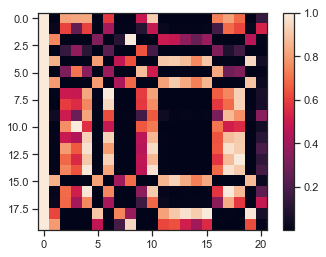

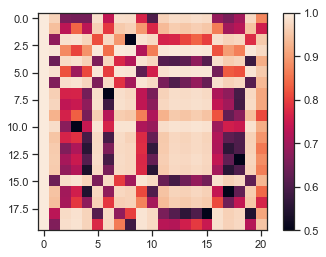

In [163]:
gauss = lambda x,s: np.exp(-(x)**2/(2*s**2))
sigmo = lambda x,s:1./(1. + np.exp(-x/s))

X,y,mu,Xp,yp = get_matrices(150,20)

plt.imshow(design_matrix(X,mu,1.0,gauss)[:20])
plt.colorbar()
plt.figure()
plt.imshow(design_matrix(X,mu,1.0,sigmo)[:20])
plt.colorbar()

### c) Train and Predict
* Get a design matrix
* Compute $\mathbf{w} = (\boldsymbol{\Phi}^\textrm{T}\boldsymbol{\Phi})^{-1}\boldsymbol{\Phi}^\textrm{T}\mathbf{y}$ using `scipy.linal` package for computing the inverse. Remember that this model is not regularized, so compute the pseudo-inverse.
* Get the "predictions" for the training data $\mathbf{w}^\textrm{T}\boldsymbol{\Phi}_\mathbf{X}$
* Get the predictions for the test/validation data $\mathbf{w}^\textrm{T}\boldsymbol{\Phi}_\mathbf{X'}$

In [164]:
from scipy import linalg
def train_and_predict(X,y,mu,Xp,yp,s,func):
    # Get the design matrix
    P=design_matrix(X,mu,s,func)
    # Get the weights
    w=linalg.pinv(P.T.dot(P)).dot(P.T).dot(y)
    # Predict 
    pred_y = P.dot(w)
    Pp = design_matrix(Xp,mu,s,func)
    pred_yp = Pp.dot(w)
    return (pred_y,pred_yp)

In [165]:
X,y,mu,Xp,yp     = get_matrices(150,20)
(pred_y,pred_yp) = train_and_predict(X,y,mu,Xp,yp,1.0,gauss)

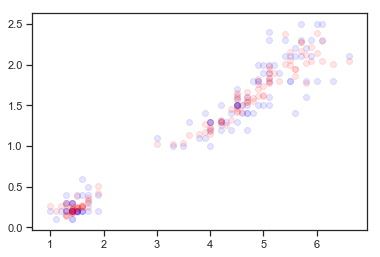

In [166]:
plt.scatter(X['petal_length'],y,c='blue',alpha=0.1)
plt.scatter(X['petal_length'],pred_y,c='red',alpha=0.1)

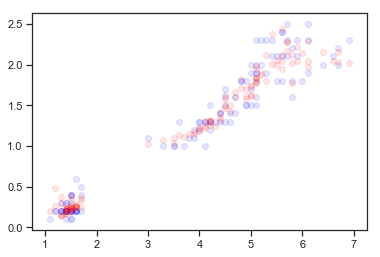

In [167]:
plt.scatter(Xp['petal_length'],yp,c='blue',alpha=0.1)
plt.scatter(Xp['petal_length'],pred_yp,c='red',alpha=0.1)

### d) Computing the RMS errors
* Compute the RMS error for the training and validation/test set: $RMS = \sqrt{\frac{\sum_i^n (y_i - y_i')^2}{n}}$
* Plot the error for $s \in [0.1,5]$
* Plot the error for $n \in [20,150]$ step = 10
* Plot the error for $m \in [10,100] $ step = 1

In [168]:
def get_errors(n,m,s,func):
    X,y,mu,Xp,yp     = get_matrices(n,m)
    (pred_y,pred_yp) = train_and_predict(X,y,mu,Xp,yp,s,func)
    return (linalg.norm(pred_y - y)/np.sqrt(len(y)),linalg.norm(pred_yp - yp)/np.sqrt(len(yp)))

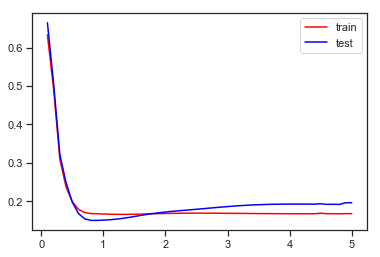

In [169]:
sspace = np.linspace(0.1,5)
train_error=[]
test_error=[]
for s in sspace:
    (tne,tse)=get_errors(150,20,s,gauss)
    train_error.append(tne)
    test_error.append(tse)
plt.plot(sspace,train_error,label='train',c='red')
plt.plot(sspace,test_error,label='test',c='blue')
plt.legend()

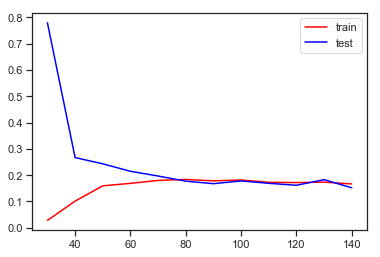

In [171]:
nspace = range(30,150,10)
train_error=[]
test_error=[]
for n in nspace:
    (tne,tse)=get_errors(n,20,1.0,gauss)
    train_error.append(tne)
    test_error.append(tse)

plt.plot(nspace,train_error,label='train',c='red')
plt.plot(nspace,test_error,label='test',c='blue')
plt.legend()
    

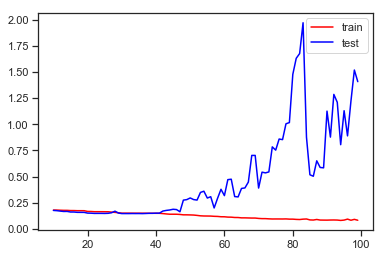

In [172]:
mspace = range(10,100,1)
train_error=[]
test_error=[]
for m in mspace:
    (tne,tse)=get_errors(150,m,1.0,gauss)
    train_error.append(tne)
    test_error.append(tse)

plt.plot(mspace,train_error,label='train',c='red')
plt.plot(mspace,test_error,label='test',c='blue')
plt.legend()

## 3.- Logistic "Regression"... into the bikeway
### Objective
* Use regression models to classify (everything is connected)
* Exercise the use of metrics
* Learn the importance of understanding the model

### Theory

Let us explore the following idea:
$$\sigma(\mathbf{w}^\textrm{T}\mathbf{x}) = \frac{1}{1+\exp(-\mathbf{w}^\textrm{T}\mathbf{x})}$$

In [ ]:
def logistic2D(w1=1,w2=1,w3=1):
    w = [w1, w2, w3]
    x1_g, x2_g = np.meshgrid(np.arange(-5., 5.0, 0.1),np.arange(-5., 5.0, 0.1))
    y = w[0] + w[1]*x1_g + w[2]*x2_g
    plt.contourf(x1_g, x2_g, 1./(1.+np.exp(-y)), cmap=plt.cm.seismic, levels = np.arange(0, 1.1, 0.05))
    plt.xlim([-5,5])
    plt.ylim([-5,5])
    plt.colorbar()
interact(logistic2D,w1=(-5,5),w2=(0.001,1.),w3=(0.001,1.))

Lets use our linear model under a sigmoid function $\sigma$ to separate classes then! 

Let $\phi(\boldsymbol{x}) = \boldsymbol{\phi}$

$Pr(Y = c_1 \mid \boldsymbol{x}) = \sigma(\boldsymbol{w}^\top\boldsymbol{\phi})$

Reciprocaly

$Pr(Y = c_2 \mid \boldsymbol{x}) = 1-\sigma(\boldsymbol{w}^\top\boldsymbol{\phi})$

Note that:

$\sigma(-a) = 1 - \sigma(a)$

So...

$\boldsymbol{w}^\top\boldsymbol{\phi} = \ln\left(\frac{Pr(Y=c_1\mid\boldsymbol{x})}{Pr(y=c_2\mid\boldsymbol{x})}\right)$,

Let us define $c_1 = 1$ and $c_2 = 0$ just because... then,

$Pr(Y=y\mid\boldsymbol{x}) = \sigma(\boldsymbol{w}^\top\boldsymbol{\phi})^y (1 - \sigma(\boldsymbol{w}^\top\boldsymbol{\phi})^{1-y}$

If we try to compute the log likelihood for a training data

$$ E(\boldsymbol{w}) = \ln Pr(\mathbf{Y}=\mathbf{y}\mid\boldsymbol{X},\boldsymbol{w}) = \sum_i \left\{y_i \ln( \sigma(\boldsymbol{w}^\top\boldsymbol{\phi}_i)) + (1-y_i)\ln(1 - \sigma(\boldsymbol{w}^\top\boldsymbol{\phi}_i))\right\}$$

Then, the gradient looks nice...

$\nabla E(\boldsymbol{w}) = \sum_{i}(\sigma(\boldsymbol{w}^\top\boldsymbol{\phi}_i)) - y_n)\boldsymbol{\phi} = 0$ 

but is no closed form to solve this, so we use iterative methods to solve them (numerical optimization methods such as Newton-Raphson). 

Obviously, Mr. Scikit Learn have coded that for us... [link](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)



In [3]:
from sklearn import linear_model
logreg = linear_model.LogisticRegression()
dfNew = dfIris[dfIris['species']!='setosa']
X=dfNew[['sepal_length','sepal_width','petal_length','petal_width']]
y=dfNew[['species']]
logreg.fit(X,y)
y_pred = logreg.predict(X)

/Users/mauricio/anaconda3/envs/ds/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/mauricio/anaconda3/envs/ds/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [4]:
y_pred

array(['versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'virginica', 'versicolor', 'virginica', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'virginica', 'virginica', 'virginica', 'virginica',
       'virginica', 'virginica', 'virginica', 'virginica', 'virginica',
       'virginica', 'virginica', 'virginica', 'virginica', 'virginica',
       'virginic

In [5]:
def comp_cont(y,y_pred):
    TP = (y[y_pred=='versicolor']=='versicolor').sum()
    FP = (y[y_pred=='versicolor']=='virginica').sum()
    TN = (y[y_pred=='virginica']=='virginica').sum()
    FN = (y[y_pred=='virginica']=='versicolor').sum()
    return(TP,FP,TN,FN)
TP,FP,TN,FN=comp_cont(y,y_pred)
print("True versicolors = ",TP[0])
print("False versicolors = ",FP[0])
print("True virginicas = ",TN[0])
print("False virginicas = ",FN[0])


True versicolors =  47
False versicolors =  0
True virginicas =  50
False virginicas =  3
